In [286]:
from IPython import get_ipython
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import math

In [287]:
# Preprocessing the data
#seperated the dependent and independent variable 

In [288]:
# creating indepedent and dependent data set

In [289]:
get_ipython().run_line_magic('matplotlib', 'inline')
dataset1 = pd.read_table('data1.dat',header=None,names=['pelvic_incidence numeric','pelvic_tilt numeric','lumbar_lordosis_angle numeric','sacral_slope numeric','pelvic_radius numeric','degree_spondylolisthesis numeric','class'], index_col=False,sep='\s+')
independent = dataset1.iloc[:,:-1]
dependent =dataset1.iloc[:,6]

In [290]:
# Encoding the Class feature to numerical value and plotting the scatter plots

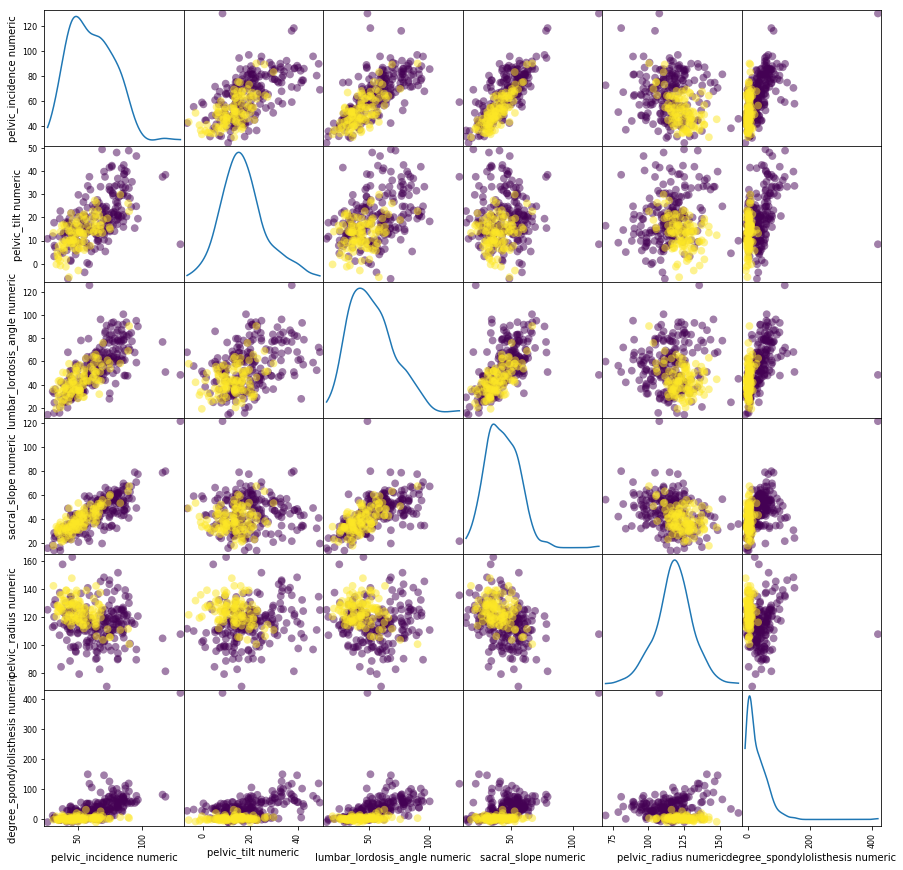

In [291]:
label_encoder = LabelEncoder()
dependent = label_encoder.fit_transform(dependent)
dataset1.iloc[0:,6]=label_encoder.fit_transform(dataset1.iloc[0:,6])
plot = pd.plotting.scatter_matrix(independent, c=dependent, figsize=(15, 15), marker='Y',
                                 hist_kwds={'bins': 20}, s=60, alpha=.5, diagonal='kde')

In [292]:
#Boxplot plotting

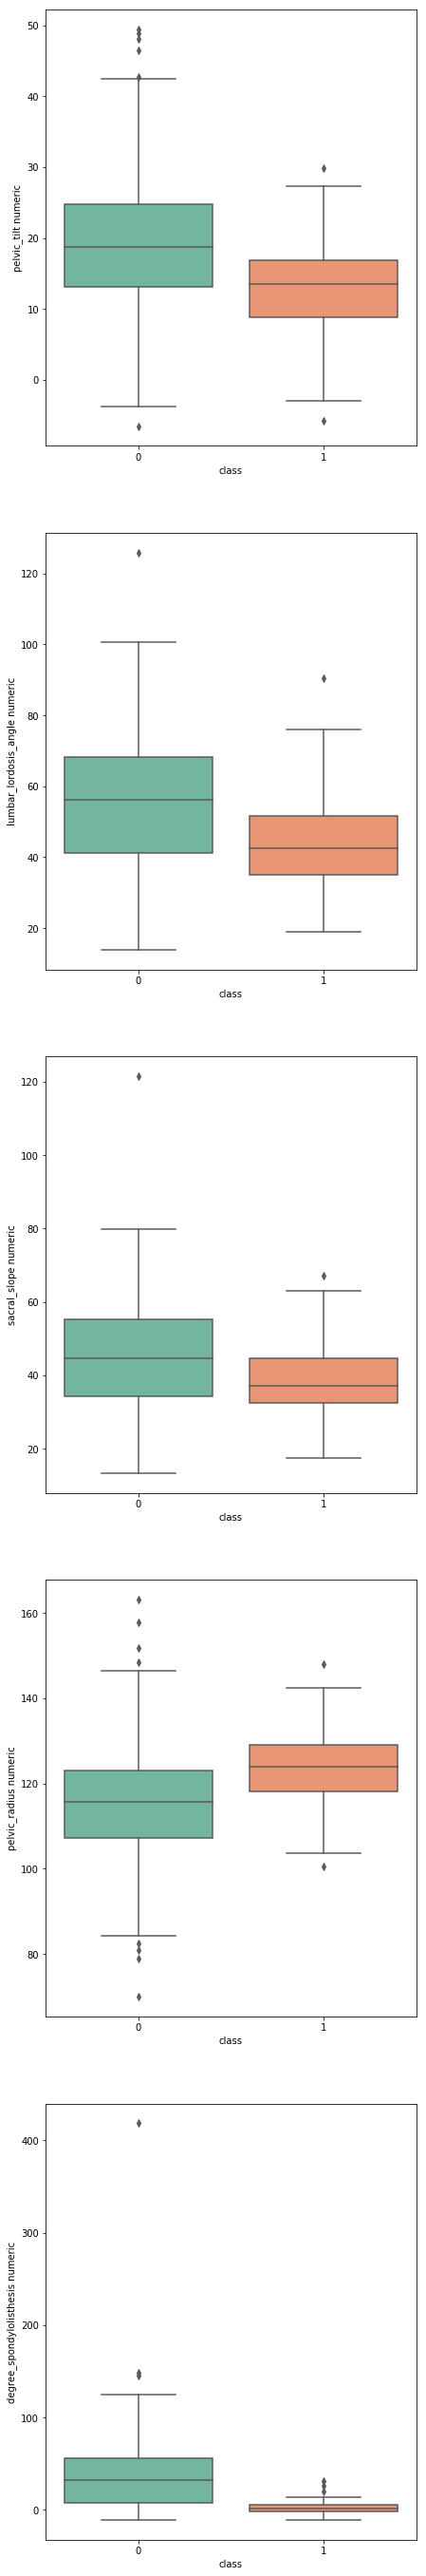

In [293]:
feature = list(dataset1.columns.values)[1:6]
f, axes = plt.subplots(5,1,figsize=(7,49), sharex=False)
for a,f in enumerate(feature):
    sns.boxplot(x= "class", y=f,data=dataset1, palette="Set2",ax=axes[a])

In [294]:
# Creating dataframes for the class 0 and class 1

In [295]:
class0 = dataset1[dataset1['class']<1]
class1 = dataset1[dataset1['class']>0]

In [296]:
# changing the values given to the class feature Abnormal = 1 and Normal = 0

In [297]:
class0 =class0.replace(0,1)
class1 = class1.replace(1,0)

class_1 = class0
class_0 = class1

train1 = class_1.iloc[:140,:]
train0 = class_0.iloc[:70,:]

training =pd.concat([train0,train1])

trainX = training.iloc[:,0:-1]
trainY = training.iloc[:,6]

classTEST1 = class_1.iloc[140:,:]
classTEST0 = class_0.iloc[70:,:]

test = pd.concat([classTEST0,classTEST1])
testX = test.iloc[:,0:-1]
testY = test.iloc[:,6]

In [298]:
# implementing the KNN algorithm using SKLearn

In [299]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
train_error= {}
test_error= {}

In [300]:
K = range(208,0,-3)
for i in K:
   
    pred = KNeighborsClassifier(n_neighbors=i)
    pred.fit(trainX, trainY)
    train_error[i]=1-(pred.score(trainX, trainY))
    test_error[i]=1-(pred.score(testX,testY))

In [301]:
#plotting of the test and train error and finding the least value of the K, which is K*

Minimum test K : 4    Error :  0.06000000000000005


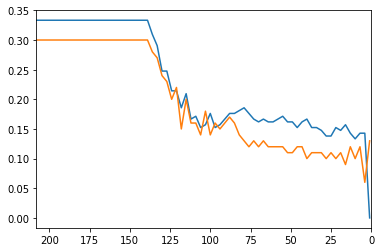

In [302]:
sortedtrain_error = sorted(train_error.items())
sortedtest_error = sorted(test_error.items())
x1,y1 = zip(*sortedtrain_error)
plt.xlim(208,0)
plt.plot(x1,y1)
x2,y2 = zip(*sortedtest_error)
plt.plot(x2,y2)
k_min = min(test_error,key=test_error.get)
print("Minimum test K :",k_min,"  ","Error : ",test_error[k_min])

In [303]:
# Now finding the predicted value for test set using K*

In [304]:
classifier = KNeighborsClassifier(n_neighbors=k_min)

classifier.fit(trainX,trainY)
predicted = classifier.predict(testX)


from sklearn.metrics import classification_report, confusion_matrix  

confusion_matrix = confusion_matrix(testY,predicted)
classification_rep=classification_report(testY, predicted)

In [305]:
# confusion Matrix

In [306]:
confusion_matrix

array([[25,  5],
       [ 1, 69]], dtype=int64)

In [307]:
# getting the True positive, true negetive, False positve and false negetive

In [308]:
true_neg=confusion_matrix[0,0]
fale_neg=confusion_matrix[1,0]
true_pos=confusion_matrix[1,1]
false_pos=confusion_matrix[0,1]
true_positive_rate=true_pos/(true_pos+fale_neg)
true_negitive_rate=true_neg/(true_neg+false_pos)
print("True Positve Rate  :   ",true_positive_rate)
print("True Negitive Rate  :   ",true_negitive_rate)

True Positve Rate  :    0.9857142857142858
True Negitive Rate  :    0.8333333333333334


In [309]:
# getting the Fscore and precesion

In [310]:
print(classification_rep)

             precision    recall  f1-score   support

          0       0.96      0.83      0.89        30
          1       0.93      0.99      0.96        70

avg / total       0.94      0.94      0.94       100



In [311]:
#  C (iii) plotting the best error rate and learning curve

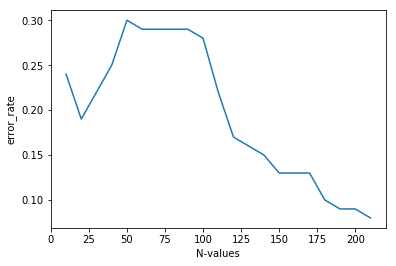

In [312]:
part_k_min={}

for j in range(10,211,10):
    part_train1=train1.iloc[:int((2*j)/3),:]
    part_train0=train0.iloc[:int(j/3),:]
    part_train=pd.concat([part_train1,part_train0])
    part_trainX=part_train.iloc[:,0:-1]
    part_trainY=part_train.iloc[:,6]
    part_test_error= {}
       
    max_k_val=j+1
    for l in range(1,max_k_val,5):
        pred = KNeighborsClassifier(n_neighbors=l)
        pred.fit(part_trainX, part_trainY)
        part_test_error[l]=1-(pred.score(testX,testY))
    part_k_min[j]=part_test_error[min(part_test_error,key=part_test_error.get)]

error_rate_sorted  = sorted(part_k_min.items())
x4,y4 = zip(*error_rate_sorted)
plt.xlabel("N-values")
plt.ylabel("error_rate")
plt.plot(x4,y4)

In [313]:
# D(i)A

In [314]:
minko_error={}
minko_train_error={}
for mino in range(1,201,5):
    
    minko = KNeighborsClassifier(n_neighbors=mino,p=1)
    minko.fit(trainX, trainY)
    minko_train_error[mino]=1-(minko.score(trainX, trainY))
    minko_error[mino]=1-(minko.score(testX,testY))
minko_k_train_min= min(minko_train_error,key=minko_train_error.get)
minko_k_min= min(minko_error,key=minko_error.get)
print("Minimum train K :",minko_k_train_min,"  ","Error : ",minko_train_error[minko_k_train_min])
print("Minimum test K :",minko_k_min,"  ","Error : ",minko_error[minko_k_min])

Minimum train K : 1    Error :  0.0
Minimum test K : 6    Error :  0.10999999999999999


In [315]:
# D(i)B 

In [316]:
manhattan_test_error_log= {}
manhattan_train_error_log={}
for q in range(1,11,1):
    w=q/10
    p_edited = math.exp(w*math.log(10))
    manhanttan_pred_log = KNeighborsClassifier(n_neighbors=6,p=p_edited,metric='minkowski')
    manhanttan_pred_log.fit(trainX, trainY)
    manhattan_train_error_log[w]=1-(manhanttan_pred_log.score(trainX,trainY))
    manhattan_test_error_log[w]=1-(manhanttan_pred_log.score(testX,testY))
manhattan_k_min_train_log = min(manhattan_train_error_log,key=manhattan_train_error_log.get)
manhattan_k_min_log = min(manhattan_test_error_log,key=manhattan_test_error_log.get)
print("Minimum test K :",manhattan_k_min_train_log,"  ","Error : ",manhattan_train_error_log[manhattan_k_min_train_log])
print("Minimum test K :",manhattan_k_min_log,"  ","Error : ",manhattan_test_error_log[manhattan_k_min_log])

Minimum test K : 1.0    Error :  0.1333333333333333
Minimum test K : 0.6    Error :  0.06000000000000005


In [317]:
# D(i)C

In [318]:
Chebyshev_test_error= {}
Chebyshev_train_error={}
for ch in range(1,201,5):
   
    Chebyshev_pred = KNeighborsClassifier(n_neighbors=ch,metric='chebyshev')
    Chebyshev_pred.fit(trainX, trainY)
    Chebyshev_train_error[ch]=1-(Chebyshev_pred.score(trainX,trainY))
    Chebyshev_test_error[ch]=1-(Chebyshev_pred.score(testX,testY))
Chebyshev_k_train_min = min(Chebyshev_train_error,key=Chebyshev_train_error.get)
Chebyshev_k_min = min(Chebyshev_test_error,key=Chebyshev_test_error.get)
print("Minimum test K :",Chebyshev_k_train_min,"  ","Error : ",Chebyshev_train_error[Chebyshev_k_train_min])
print("Minimum test K :",Chebyshev_k_min,"  ","Error : ",Chebyshev_test_error[Chebyshev_k_min])

Minimum test K : 1    Error :  0.0
Minimum test K : 16    Error :  0.07999999999999996


In [319]:
# D(ii)

In [320]:
# D(ii)
mahalanobis_test_error = {}
mahalanobis_train_error={}
invertrainx = np.linalg.pinv(trainX)
for ma in range(1,201,5):
    
    mahalanobis_pred = KNeighborsClassifier(n_neighbors=ma,algorithm='brute',metric='mahalanobis', metric_params={'V': invertrainx})
    mahalanobis_pred.fit(trainX, trainY)
    mahalanobis_train_error[ma]=1-(mahalanobis_pred.score(trainX,trainY))
    mahalanobis_test_error[ma]=1-(mahalanobis_pred.score(testX,testY))
mahalanobis_k_train_min = min(mahalanobis_train_error,key= mahalanobis_train_error.get) 
mahalanobis_k_min = min( mahalanobis_test_error,key= mahalanobis_test_error.get)
print("Minimum test K :",mahalanobis_k_train_min,"  ","Error : ",mahalanobis_train_error[mahalanobis_k_train_min])

print("Minimum test K :",mahalanobis_k_min,"  ","Error : ",mahalanobis_test_error[mahalanobis_k_min])


Minimum test K : 1    Error :  0.0
Minimum test K : 6    Error :  0.16000000000000003


In [321]:
# E(i)

In [322]:
weight_train_error={}
weight_test_error={}
for wi in range(1,201,5):
    
    weight = KNeighborsClassifier(n_neighbors=wi,metric='euclidean',weights='distance')
    weight.fit(trainX, trainY)
    weight_train_error[wi]=1-(weight.score(trainX, trainY))
    weight_test_error[wi]=1-(weight.score(testX,testY))
weight_k_train_min = min(weight_train_error,key= weight_train_error.get) 
weight_k_min = min( weight_test_error,key= weight_test_error.get)
print("Minimum test K :",weight_k_train_min,"  ","Error : ",weight_train_error[weight_k_train_min])
print("Minimum test K :",weight_k_min,"  ","Error : ",weight_test_error[weight_k_min])

Minimum test K : 1    Error :  0.0
Minimum test K : 6    Error :  0.09999999999999998


In [323]:
# E(ii)

In [324]:
weight_train_error1={}
weight_test_error1={}
for wi in range(1,201,5):
    
    weight1 = KNeighborsClassifier(n_neighbors=wi,metric='minkowski',weights='distance',p=1)
    weight1.fit(trainX, trainY)
    weight_train_error1[wi]=1-(weight1.score(trainX, trainY))
    weight_test_error1[wi]=1-(weight1.score(testX,testY))
weight_k_train_min1 = min(weight_train_error1,key= weight_train_error1.get)     
weight_k_min1 = min( weight_test_error1,key= weight_test_error1.get)
print("Minimum test K :",weight_k_train_min1,"  ","Error : ",weight_train_error1[weight_k_train_min1])
print("Minimum test K :",weight_k_min1,"  ","Error : ",weight_test_error1[weight_k_min1])

Minimum test K : 1    Error :  0.0
Minimum test K : 26    Error :  0.09999999999999998


In [325]:
# E(iiI)

In [326]:
weight_train_error2={}
weight_test_error2={}
for wi in range(1,201,5):
    
    weight2 = KNeighborsClassifier(n_neighbors=wi,metric='chebyshev',weights='distance')
    weight2.fit(trainX, trainY)
    weight_train_error2[wi]=1-(weight2.score(trainX, trainY))
    weight_test_error2[wi]=1-(weight2.score(testX,testY))
weight_k_train_min2 = min(weight_train_error2,key= weight_train_error2.get)    
weight_k_min2 = min( weight_test_error2,key= weight_test_error2.get)
print("Minimum train K :",weight_k_train_min2,"  ","Error : ",weight_train_error2[weight_k_train_min2])
print("Minimum test K :",weight_k_min2,"  ","Error : ",weight_test_error2[weight_k_min2])

Minimum train K : 1    Error :  0.0
Minimum test K : 16    Error :  0.10999999999999999


In [327]:
# F

What is the lowest training error rate you achieved in this exercise?

lowest Test error - Minimum test K : 4    Error :  0.06000000000000005  
lowest Train error - Minimum train K : 1    Error :  0.0 